# Mesa tutorial

Run the model 20 times on a 15x15 grid, with 20 agents

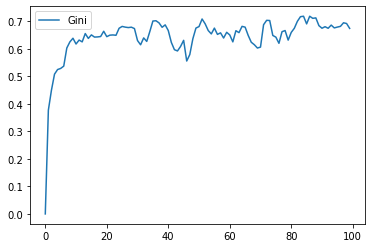

In [1]:
import matplotlib.pyplot as plt
import numpy as np 

from MoneyModel import MoneyModel

model = MoneyModel(100, 10, 10)
for i in range(100):
    model.step()

agent_counts = np.zeros((model.grid.width, model.grid.height))

for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

Next, we wanto to visualize other dataframes

In [2]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth   Grump
Step AgentID                
0    0             1  grump!
     1             1  grump!
     2             1  grump!
     3             1  grump!
     4             1  grump!

histogram it

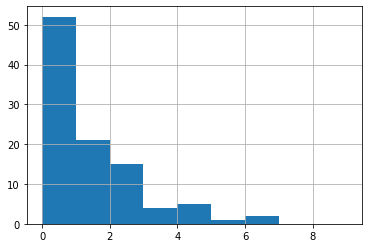

In [3]:
end_wealth = agent_wealth.xs(99, level="Step")["Wealth"]
end_wealth.hist(bins=range(agent_wealth.Wealth.max()+1))

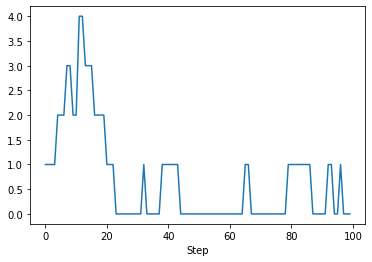

In [4]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

Run as batch 

In [5]:
from mesa.batchrunner import BatchRunner
from MoneyModel import compute_gini

fixed_params = {
    "width": 10,
    "height": 10
}

variable_params = {"number_of_agents": range(10, 500, 10)}

# The variables parameters will be invoke along with the fixed parameters allowing for either or both to be honored.
batch_run = BatchRunner(
    MoneyModel,
    variable_params,
    fixed_params,
    iterations=5,
    max_steps=100,
    model_reporters={"Gini": compute_gini}
)

batch_run.run_all()

245it [03:11,  1.28it/s]


visualize the datafram

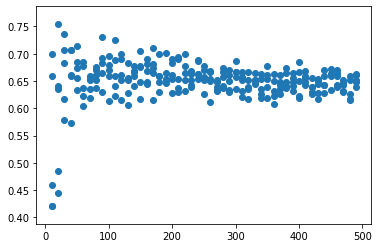

In [7]:
run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.number_of_agents, run_data.Gini)